In [8]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils import data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
torch.manual_seed(1) 

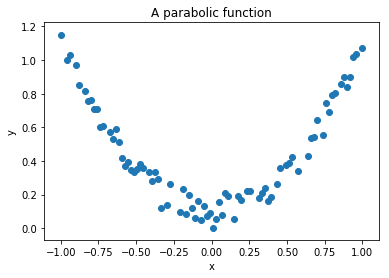

In [11]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
splits = train_test_split(x.numpy(), y.numpy(), test_size=0.2)
x_train, x_test = [Variable(torch.from_numpy(x).float())for x in splits[:2]]
y_train, y_test = [Variable(torch.from_numpy(x).float())for x in splits[2:]]

plt.scatter(x_train.data.numpy(), y_train.data.numpy())
plt.title("A parabolic function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

## The Neural Network Architecture

In [12]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [20]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


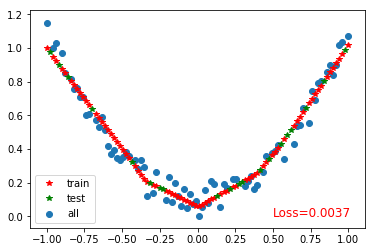

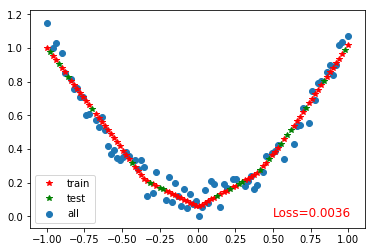

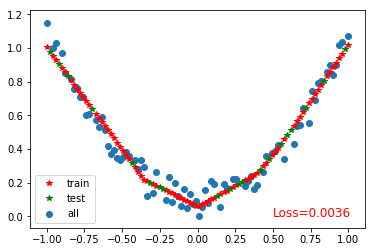

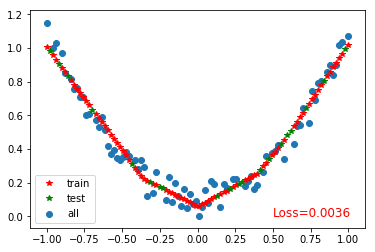

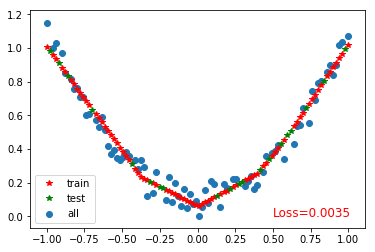

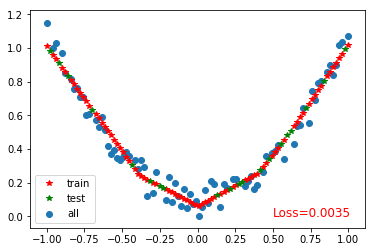

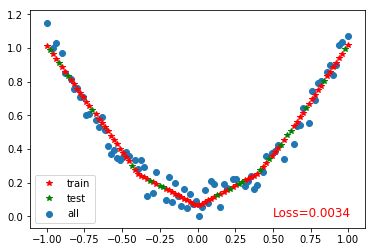

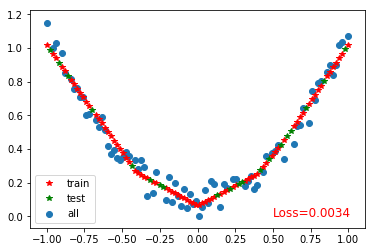

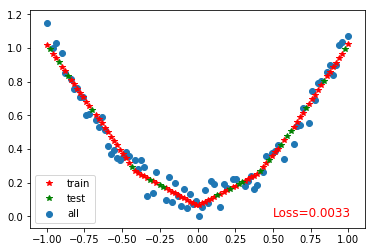

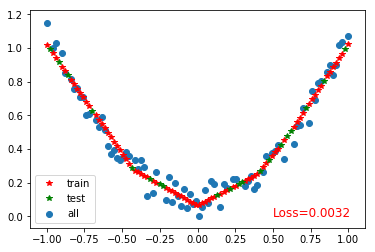

In [23]:
plt.ion()   # something about plotting
for t in range(200):
    prediction = net(x_train)     # input x and predict based on x

    loss = loss_func(prediction, y_train)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    
    loss.backward()         # backpropagation, compute gradients
    
    optimizer.step()        # apply gradients

    y_pred = net(x_test)
    
    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x_train.data.numpy(), y_train.data.numpy())
        plt.plot(x_train.data.numpy(), prediction.data.numpy(), 'r*', lw=5)
        plt.plot(x_test.data.numpy(), y_pred.data.numpy(), 'g*', lw=1)
        plt.legend(['train', 'test', 'all'])
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 12, 'color':  'red'})
        plt.show()
        plt.pause(0.1)
plt.ioff()